<a href="https://colab.research.google.com/github/gulabpatel/Computer_Vision/blob/main/01_feature_extraction_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Computer Vision and Image Processing 
Reading the image
   

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2              # open computer vision library
from skimage import io  # for loading images from url

Load the Images 

In [2]:
url_1 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/yard-00.png"
url_2 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/yard-01.png"
image_1 = io.imread(url_1)
image_2 = io.imread(url_2)

Visualize Images

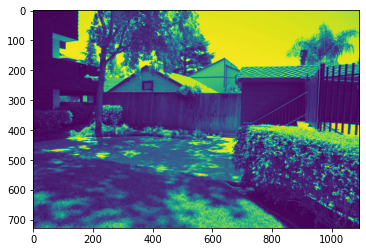

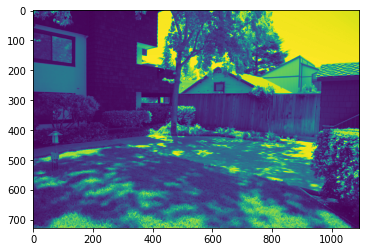

In [3]:
plt.imshow(image_1)
plt.show()
plt.imshow(image_2)
plt.show()

Detect ORB Keypoints and Features in the images

In [4]:
orb1 = cv2.ORB_create(nfeatures=1000, scaleFactor=2, nlevels=6)
keypoints_1, descriptors_1 = orb1.detectAndCompute(image_1, mask=None)

orb2 = cv2.ORB_create(nfeatures=1000, scaleFactor=2, nlevels=4)
keypoints_2, descriptors_2 = orb2.detectAndCompute(image_2, mask=None)

Visualize the Keypoints

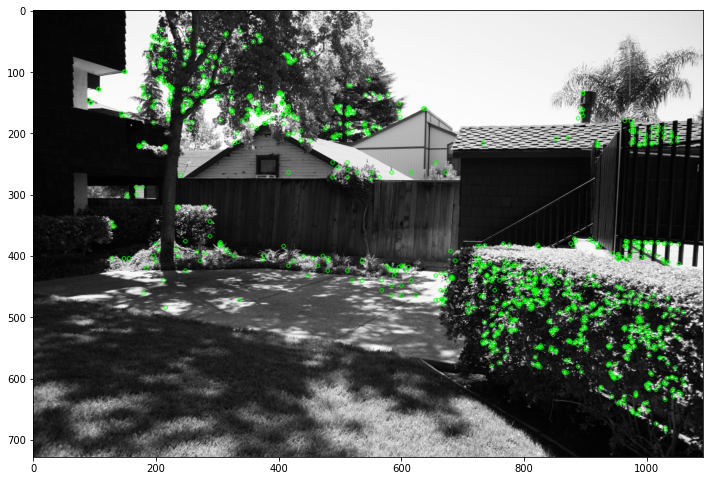

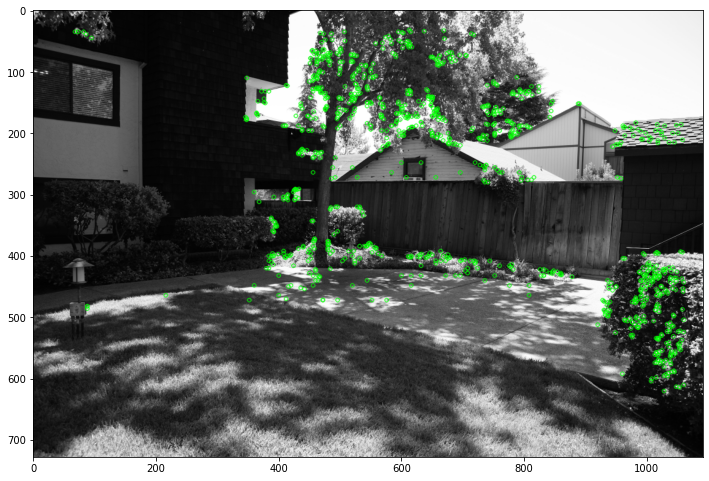

In [5]:
img1_with_kp = cv2.drawKeypoints(image_1, keypoints_1, outImage=None, color=(0,255,0))
img2_with_kp = cv2.drawKeypoints(image_2, keypoints_2, outImage=None, color=(0,255,0))
plt.figure(figsize = (12, 12))
plt.imshow(img1_with_kp)
plt.show()
plt.figure(figsize = (12, 12))
plt.imshow(img2_with_kp)
plt.show()

Inspect Kepoints and Descriptors

In [6]:
print("No of keypoints detected in Image 1:", len(keypoints_1))
print("No of keypoints detected in Image 2:", len(keypoints_2))
print("First Keypoint x,y location:", keypoints_1[0].pt)
print("Shape Descriptors_1:", descriptors_1.shape)
print("Shape Descriptors_2:", descriptors_2.shape)
print("First Descriptor:", descriptors_1[0])

No of keypoints detected in Image 1: 952
No of keypoints detected in Image 2: 1000
First Keypoint x,y location: (737.0, 538.0)
Shape Descriptors_1: (952, 32)
Shape Descriptors_2: (1000, 32)
First Descriptor: [133 182  85   3  60  31 163 184  94 242  48 236 214 112 220 164  31  76
 122 127 227 244 125  31  44  30  37 116  92 171  73 189]


Match the descriptors of two images \\
OpenCV's Brute Force method \\
Alternative is FLANN: kd tree based matching

In [7]:
matcher = cv2.BFMatcher()
matches = matcher.match(descriptors_1, descriptors_2)

Visualize the matches

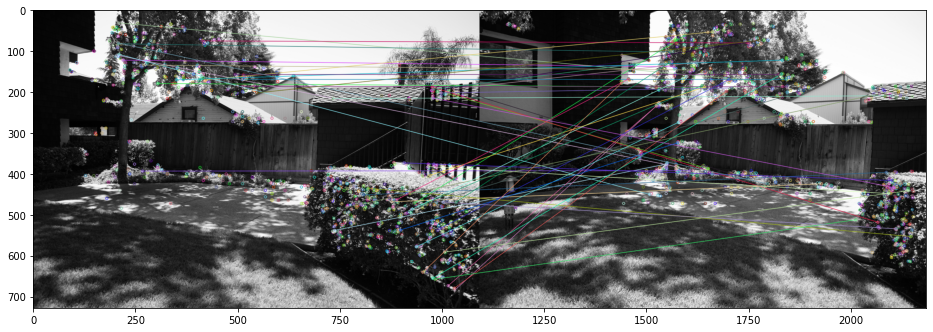

In [8]:
match_img = cv2.drawMatches(image_1, keypoints_1, image_2, keypoints_2, matches[:50], outImg=None)
plt.figure(figsize = (16, 8))
plt.imshow(match_img)
plt.show()

------